<a href="https://colab.research.google.com/github/escapingLife/mashinePrograming/blob/master/5%EC%A3%BC%EC%B0%A8/DL_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. 데이터 불러오기
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
# 2. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# 3. One-hot 인코딩
y_categorical = to_categorical(y, num_classes=10)

In [11]:
# 4. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.3, random_state=42
)

In [12]:
# 5. DL 모델 정의 (MLP)
model = Sequential()
model.add(Dense(128, input_shape=(64,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 숫자 0~9 → 10개 클래스

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 6. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['accuracy']
)

In [18]:
# 7. 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 1.4087e-06 - val_accuracy: 0.9778 - val_loss: 0.0040
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 6.0658e-06 - val_accuracy: 0.9630 - val_loss: 0.0056
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9973 - loss: 4.9298e-04 - val_accuracy: 0.9722 - val_loss: 0.0044
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9978 - loss: 3.7791e-04 - val_accuracy: 0.9685 - val_loss: 0.0052
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.9558e-05 - val_accuracy: 0.9759 - val_loss: 0.0040
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1933e-05 - val_accuracy: 0.9759 - val_loss: 0.0041
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.1098e-06 - val_accuracy: 0.9741 - val_loss: 0.0041
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.0116e-06 -

In [20]:
# 8. 평가
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"DL 모델 테스트 정확도: {acc:.4f}")

DL 모델 테스트 정확도: 0.9722


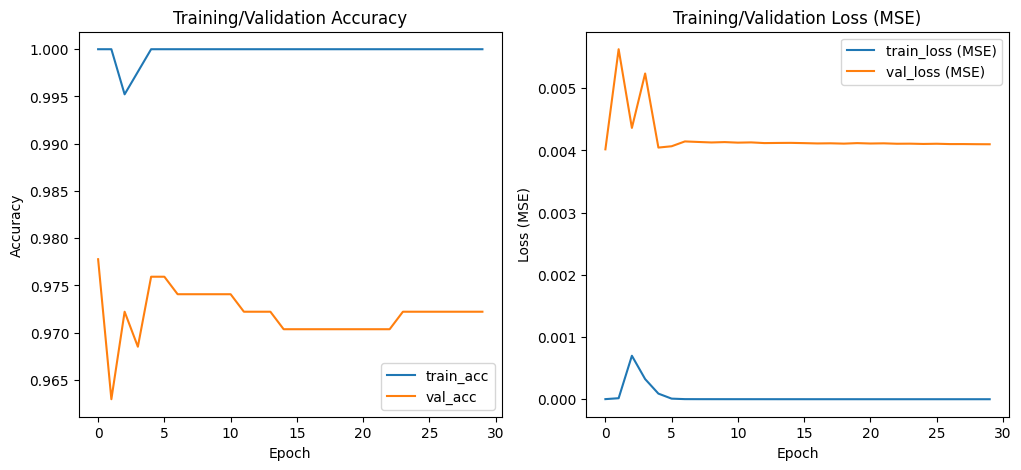

In [21]:
# 9. 학습 곡선 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training/Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss (MSE)')
plt.plot(history.history['val_loss'], label='val_loss (MSE)')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training/Validation Loss (MSE)")

plt.show()